In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from keras.preprocessing.image import ImageDataGenerator

In [3]:
df = pd.read_csv('/content/drive/My Drive/University/UIU/11-Summer 2020/Pattern Lab/Papers and datasets/Datasets for 224/Image Augmentation on FER/fer2013.csv')
print(df.shape)

(35887, 3)


In [4]:
df.head()

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


## Processing disgust class

In [5]:
#selecting rows with disgust as labels
dgst_sam = df.loc[df['emotion'] == 1]
dgst_sam.head()

,emotion,pixels,Usage
299,1,126 126 129 120 110 168 174 172 173 174 170 15...,Training
388,1,89 55 24 40 43 48 53 55 59 41 33 31 22 32 42 4...,Training
416,1,204 195 181 131 50 50 57 56 66 98 138 161 173 ...,Training
473,1,14 11 13 12 41 95 113 112 111 122 132 137 142 ...,Training
533,1,18 25 49 75 89 97 100 100 101 103 105 107 107 ...,Training


In [6]:
pixels = dgst_sam.loc[:,'pixels'].values
y = dgst_sam.loc[:, 'emotion'].values

print(y.shape)
print(pixels.shape)

(547,)
(547,)


##Transforming pixels in the right format

In [7]:
# Setup
!pip install -q wordcloud
import wordcloud

import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger') 

from nltk import word_tokenize

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [8]:
px = []
for x in pixels : 
    x = word_tokenize(x)
    x = [float(t) for t in x]
    px.append(x)

In [9]:
x = np.array(px)
print(x.shape)

(547, 2304)


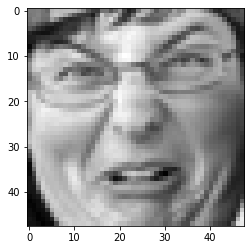

In [10]:
plt.imshow(x[0].reshape((48, 48)), interpolation='none', cmap='gray')
plt.show()

In [11]:
#conversion 1D array of pixels into a 2D numpy array
x = x.reshape((x.shape[0],48, 48,1 ))
print (x.shape)

(547, 48, 48, 1)


## Image Augmentation


## Rotation

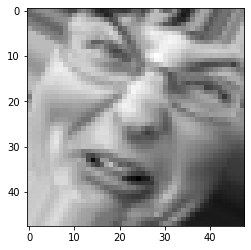

In [12]:
datagen=ImageDataGenerator(
    rotation_range=180
)
imagegen=datagen.flow(x, batch_size=547, shuffle=False)
x1=imagegen.next()

plt.imshow(x1[0].reshape((48, 48)), cmap='gray')
plt.show()


## Height Shift

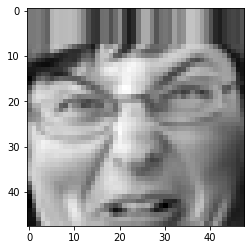

In [13]:
datagen=ImageDataGenerator(
    height_shift_range=0.25
)
imagegen=datagen.flow(x, batch_size=547, shuffle=False)
x2=imagegen.next()

plt.imshow(x2[0].reshape((48, 48)), cmap='gray')
plt.show()


## Width Shift

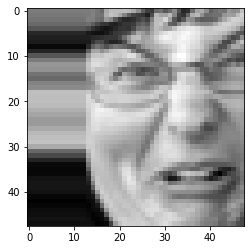

In [14]:
datagen=ImageDataGenerator(
    width_shift_range=0.35
)

imagegen=datagen.flow(x, batch_size=547, shuffle=False)
x3=imagegen.next()

plt.imshow(x3[0].reshape((48, 48)), cmap='gray')
plt.show()

## Horizontal Flip

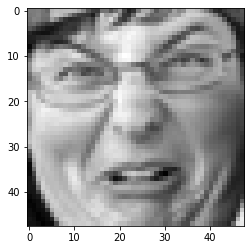

In [15]:
datagen = ImageDataGenerator(
     horizontal_flip = True
)

imagegen = datagen.flow(x, batch_size=547, shuffle=False)
x4 = imagegen.next()

plt.imshow(x4[0].reshape((48, 48)), cmap='gray')
plt.show()

## Vertical Shift

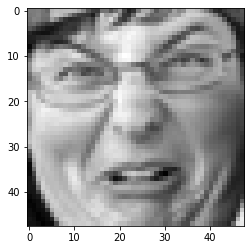

In [16]:
datagen = ImageDataGenerator(
     vertical_flip = True
)

imagegen = datagen.flow(x, batch_size=547, shuffle=False)
x5 = imagegen.next()

plt.imshow(x5[0].reshape((48, 48)), cmap='gray')
plt.show()

## Shear Intensity

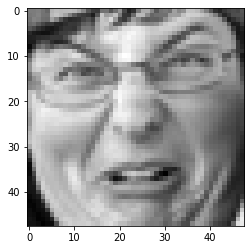

In [17]:
datagen = ImageDataGenerator(
     shear_range = 60
)

imagegen = datagen.flow(x, batch_size=547, shuffle=False)
x6 = imagegen.next()

plt.imshow(x6[0].reshape((48, 48)), cmap='gray')
plt.show()

## Zoom Range

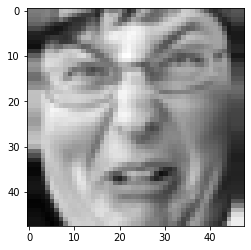

In [18]:
datagen = ImageDataGenerator(
      zoom_range = [0.8, 1.2]
)

imagegen = datagen.flow(x, batch_size=547, shuffle=False)
x7 = imagegen.next()

plt.imshow(x7[0].reshape((48, 48)), cmap='gray')
plt.show()

## Brightness Level

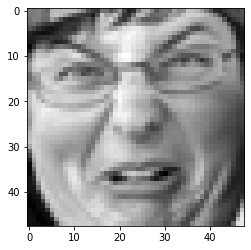

In [19]:
datagen = ImageDataGenerator(
      brightness_range=[0,2]
)

imagegen = datagen.flow(x, batch_size=547, shuffle=False)
x8 = imagegen.next()

plt.imshow(x8[0].reshape((48, 48)), cmap='gray')
plt.show()

## Rescaling

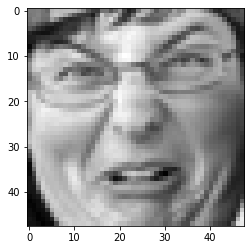

In [20]:
datagen = ImageDataGenerator(
      rescale=1/255
)

imagegen = datagen.flow(x, batch_size=547, shuffle=False)
x9 = imagegen.next()

plt.imshow(x9[0].reshape((48, 48)), cmap='gray')
plt.show()

## Channel Shift

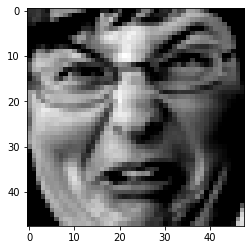

In [24]:
datagen = ImageDataGenerator(
      channel_shift_range=100
)

imagegen = datagen.flow(x, batch_size=547, shuffle=False)
x10 = imagegen.next()

plt.imshow(x10[0].reshape((48, 48)), cmap='gray')
plt.show()

## combining the augmented dataset

In [25]:
aug_x = np.concatenate((x1, x2, x3, x4, x5, x6, x7, x8, x9, x10), axis=0)
print(aug_x.shape)

(5470, 48, 48, 1)


In [26]:
#total disgust data
new_disgust_data = np.concatenate((x, aug_x), axis=0)
print(new_disgust_data.shape)

(6017, 48, 48, 1)


In [27]:
disgust_y = np.array([1]*6017)
print(disgust_y.shape)

(6017,)


## Creating a new dataset with augmented images

In [28]:
#selecting rows with disgust as labels
non_dgst_sam = df.loc[df['emotion'] != 1]
non_dgst_sam.head()

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


In [29]:
non_dgst_sam.shape

(35340, 3)

In [30]:
rest_pixels = non_dgst_sam.loc[:,'pixels'].values
rest_y = non_dgst_sam.loc[:, 'emotion'].values

print(rest_y.shape)
print(rest_pixels.shape)

(35340,)
(35340,)


In [31]:
new_px = []
for x in rest_pixels : 
    x1 = word_tokenize(x)
    x1 = [float(t) for t in x1]
    new_px.append(x1)

In [32]:
new_x = np.array(new_px)
print(new_x.shape)

(35340, 2304)


In [33]:
#conversion 1D array of pixels into a 2D numpy array
new_x = new_x.reshape((new_x.shape[0],48, 48,1 ))
print (new_x.shape)

(35340, 48, 48, 1)


In [34]:
#total data
total_X = np.concatenate((new_x, new_disgust_data), axis=0)
print(total_X.shape)

(41357, 48, 48, 1)


In [35]:
total_y = np.concatenate((rest_y, disgust_y), axis=0)
total_y=np.vstack(total_y)
print(np.shape(total_y))

(41357, 1)


## Data Preprocessing

In [38]:
import pandas as pd
from matplotlib import pyplot
from math import sqrt 
import numpy as np 
import scipy
import scipy.misc 
from IPython.display import display 
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator 
from keras.utils import plot_model
from keras.models import Model
from keras.layers import Input, Dense, Flatten, Dropout, BatchNormalization
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPooling2D
from keras.layers.merge import concatenate
from keras.optimizers import Adam, SGD
from keras.regularizers import l1, l2
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder 

In [41]:
total_X = total_X.astype(np.float32) 
total_y = np_utils.to_categorical(total_y, 7)

In [44]:
X_train, X_rest, y_train, y_rest = train_test_split(total_X, total_y, test_size=0.4, random_state=0)
X_val, X_test, y_val, y_test = train_test_split(X_rest, y_rest, test_size=0.5, random_state=0)

print(X_train.shape[0])
print(X_val.shape[0])
print(X_test.shape[0])

24814
8271
8272


In [45]:
testgen = ImageDataGenerator( 
    rescale=1./255
    )

batch_size = 64

train_flow = testgen.flow(X_train, y_train, batch_size=batch_size) 
val_flow = testgen.flow(X_val, y_val, batch_size=batch_size) 
test_flow = testgen.flow(X_test, y_test, batch_size=batch_size) 

## Model build

In [48]:
def FER_Model(input_shape=(48,48,1)):
    # first input model
    visible = Input(shape=input_shape, name='input')
    num_classes = 7
    #the 1-st block
    conv1_1 = Conv2D(64, kernel_size=3, activation='relu', padding='same', name = 'conv1_1')(visible)
    conv1_1 = BatchNormalization()(conv1_1)
    conv1_2 = Conv2D(64, kernel_size=3, activation='relu', padding='same', name = 'conv1_2')(conv1_1)
    conv1_2 = BatchNormalization()(conv1_2)
    pool1_1 = MaxPooling2D(pool_size=(2,2), name = 'pool1_1')(conv1_2)
    drop1_1 = Dropout(0.3, name = 'drop1_1')(pool1_1)

    #the 2-nd block
    conv2_1 = Conv2D(128, kernel_size=3, activation='relu', padding='same', name = 'conv2_1')(drop1_1)
    conv2_1 = BatchNormalization()(conv2_1)
    conv2_2 = Conv2D(128, kernel_size=3, activation='relu', padding='same', name = 'conv2_2')(conv2_1)
    conv2_2 = BatchNormalization()(conv2_2)
    conv2_3 = Conv2D(128, kernel_size=3, activation='relu', padding='same', name = 'conv2_3')(conv2_2)
    conv2_2 = BatchNormalization()(conv2_3)
    pool2_1 = MaxPooling2D(pool_size=(2,2), name = 'pool2_1')(conv2_3)
    drop2_1 = Dropout(0.3, name = 'drop2_1')(pool2_1)

    #the 3-rd block
    conv3_1 = Conv2D(256, kernel_size=3, activation='relu', padding='same', name = 'conv3_1')(drop2_1)
    conv3_1 = BatchNormalization()(conv3_1)
    conv3_2 = Conv2D(256, kernel_size=3, activation='relu', padding='same', name = 'conv3_2')(conv3_1)
    conv3_2 = BatchNormalization()(conv3_2)
    conv3_3 = Conv2D(256, kernel_size=3, activation='relu', padding='same', name = 'conv3_3')(conv3_2)
    conv3_3 = BatchNormalization()(conv3_3)
    conv3_4 = Conv2D(256, kernel_size=3, activation='relu', padding='same', name = 'conv3_4')(conv3_3)
    conv3_4 = BatchNormalization()(conv3_4)
    pool3_1 = MaxPooling2D(pool_size=(2,2), name = 'pool3_1')(conv3_4)
    drop3_1 = Dropout(0.3, name = 'drop3_1')(pool3_1)

    #the 4-th block
    conv4_1 = Conv2D(256, kernel_size=3, activation='relu', padding='same', name = 'conv4_1')(drop3_1)
    conv4_1 = BatchNormalization()(conv4_1)
    conv4_2 = Conv2D(256, kernel_size=3, activation='relu', padding='same', name = 'conv4_2')(conv4_1)
    conv4_2 = BatchNormalization()(conv4_2)
    conv4_3 = Conv2D(256, kernel_size=3, activation='relu', padding='same', name = 'conv4_3')(conv4_2)
    conv4_3 = BatchNormalization()(conv4_3)
    conv4_4 = Conv2D(256, kernel_size=3, activation='relu', padding='same', name = 'conv4_4')(conv4_3)
    conv4_4 = BatchNormalization()(conv4_4)
    pool4_1 = MaxPooling2D(pool_size=(2,2), name = 'pool4_1')(conv4_4)
    drop4_1 = Dropout(0.3, name = 'drop4_1')(pool4_1)

    #the 5-th block
    conv5_1 = Conv2D(512, kernel_size=3, activation='relu', padding='same', name = 'conv5_1')(drop4_1)
    conv5_1 = BatchNormalization()(conv5_1)
    conv5_2 = Conv2D(512, kernel_size=3, activation='relu', padding='same', name = 'conv5_2')(conv5_1)
    conv5_2 = BatchNormalization()(conv5_2)
    conv5_3 = Conv2D(512, kernel_size=3, activation='relu', padding='same', name = 'conv5_3')(conv5_2)
    conv5_3 = BatchNormalization()(conv5_3)
    conv5_4 = Conv2D(512, kernel_size=3, activation='relu', padding='same', name = 'conv5_4')(conv5_3)
    conv5_3 = BatchNormalization()(conv5_3)
    pool5_1 = MaxPooling2D(pool_size=(2,2), name = 'pool5_1')(conv5_4)
    drop5_1 = Dropout(0.3, name = 'drop5_1')(pool5_1)

    #Flatten and output
    flatten = Flatten(name = 'flatten')(drop5_1)
    ouput = Dense(num_classes, activation='softmax', name = 'output')(flatten)

    # create model 
    model = Model(inputs =visible, outputs = ouput)
    # summary layers
    print(model.summary())
    
    return model

In [49]:
model = FER_Model()
opt = Adam(lr=0.0001, decay=1e-6)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy']) 

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, 48, 48, 1)]       0         
_________________________________________________________________
conv1_1 (Conv2D)             (None, 48, 48, 64)        640       
_________________________________________________________________
batch_normalization (BatchNo (None, 48, 48, 64)        256       
_________________________________________________________________
conv1_2 (Conv2D)             (None, 48, 48, 64)        36928     
_________________________________________________________________
batch_normalization_1 (Batch (None, 48, 48, 64)        256       
_________________________________________________________________
pool1_1 (MaxPooling2D)       (None, 24, 24, 64)        0         
_________________________________________________________________
drop1_1 (Dropout)            (None, 24, 24, 64)       

In [50]:
from keras.callbacks import ModelCheckpoint
filepath="weights_min_loss.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
callbacks_list = [checkpoint]

In [51]:
num_epochs = 200 # we iterate 200 times over the entire training set 
history = model.fit_generator(train_flow, 
                    steps_per_epoch=len(X_train) / batch_size, 
                    epochs=num_epochs,  
                    verbose=2,  
                    callbacks=callbacks_list,
                    validation_data=val_flow,  
                    validation_steps=len(X_val) / batch_size) 

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/200

Epoch 00001: val_loss improved from inf to 2.04130, saving model to weights_min_loss.hdf5
388/387 - 64s - loss: 2.1510 - accuracy: 0.1931 - val_loss: 2.0413 - val_accuracy: 0.1577
Epoch 2/200

Epoch 00002: val_loss improved from 2.04130 to 1.92545, saving model to weights_min_loss.hdf5
388/387 - 63s - loss: 1.8708 - accuracy: 0.2435 - val_loss: 1.9255 - val_accuracy: 0.2524
Epoch 3/200

Epoch 00003: val_loss improved from 1.92545 to 1.91336, saving model to weights_min_loss.hdf5
388/387 - 62s - loss: 1.8174 - accuracy: 0.2762 - val_loss: 1.9134 - val_accuracy: 0.2806
Epoch 4/200

Epoch 00004: val_loss did not improve from 1.91336
388/387 - 62s - loss: 1.7337 - accuracy: 0.3259 - val_loss: 1.9764 - val_accuracy: 0.3261
Epoch 5/200

Epoch 00005: val_loss improved from 1.91336 to 1.61174, saving model to weights_min_loss.hdf5
388/387 - 62s - loss: 1.6419 - accuracy: 0.3688 - val_loss: 1.6117 - val_acc

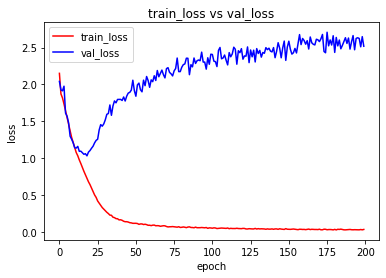

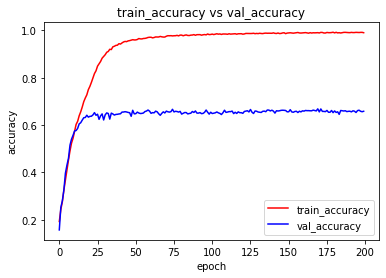

In [52]:
# visualizing losses and accuracy
%matplotlib inline

train_loss=history.history['loss']
val_loss=history.history['val_loss']
train_acc=history.history['accuracy']
val_acc=history.history['val_accuracy']

epochs = range(len(train_acc))

plt.plot(epochs,train_loss,'r', label='train_loss')
plt.plot(epochs,val_loss,'b', label='val_loss')
plt.title('train_loss vs val_loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.figure()

plt.plot(epochs,train_acc,'r', label='train_accuracy')
plt.plot(epochs,val_acc,'b', label='val_accuracy')
plt.title('train_accuracy vs val_accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()

In [53]:
loss = model.evaluate_generator(test_flow, steps=len(X_test) / batch_size) 
print("Test Loss " + str(loss[0]))
print("Test Acc: " + str(loss[1]))

Instructions for updating:
Please use Model.evaluate, which supports generators.
Test Loss 2.572871208190918
Test Acc: 0.6434961557388306


In [54]:
model.save('Fer2013.hdf5') 

In [55]:
loss = model.evaluate(X_test/255., y_test) 
print("Test Loss " + str(loss[0]))
print("Test Acc: " + str(loss[1]))

259/259 [==============================] - 7s 29ms/step - loss: 2.5729 - accuracy: 0.6435
Test Loss 2.572871208190918
Test Acc: 0.6434961557388306


In [56]:
loss = model.evaluate(X_val/255., y_val) 
print("Validation Loss " + str(loss[0]))
print("Validation Acc: " + str(loss[1]))

259/259 [==============================] - 8s 29ms/step - loss: 2.5191 - accuracy: 0.6584
Validation Loss 2.519071340560913
Validation Acc: 0.6584451794624329


In [60]:
def plot_confusion_matrix(y_test, y_pred, classes,
                          normalize=False,
                          title='Unnormalized confusion matrix',
                          cmap=plt.cm.Blues):
    cm = confusion_matrix(y_test, y_pred)
    
    if normalize:
        cm = np.round(cm.astype('float') / cm.sum(axis=1)[:, np.newaxis], 2)
        
    np.set_printoptions(precision=2)
        
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.min() + (cm.max() - cm.min()) / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True expression')
    plt.xlabel('Predicted expression')
    plt.show()

In [58]:
y_pred_ = model.predict(X_test/255., verbose=1)
y_pred = np.argmax(y_pred_, axis=1)
t_te = np.argmax(y_test, axis=1)

259/259 [==============================] - 7s 26ms/step


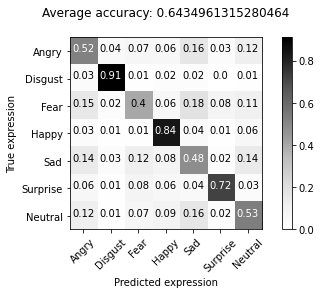

In [62]:
classes=np.array(("Angry", "Disgust", "Fear", "Happy", "Sad", "Surprise", "Neutral"))
fig = plot_confusion_matrix(y_test=t_te, y_pred=y_pred,
                      classes=classes,
                      normalize=True,
                      cmap=plt.cm.Greys,
                      title='Average accuracy: ' + str(np.sum(y_pred == t_te)/len(t_te)) + '\n')